In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import datasets

cancer = datasets.load_breast_cancer()

Class: linear
Accuracy: 0.9298245614035088
Precision: 0.9594594594594594
Recall: 0.9342105263157895
Class: poly
Accuracy: 0.9385964912280702
Precision: 0.9156626506024096
Recall: 1.0
Class: rbf
Accuracy: 0.956140350877193
Precision: 0.9382716049382716
Recall: 1.0
Class: sigmoid
Accuracy: 0.9122807017543859
Precision: 0.9459459459459459
Recall: 0.9210526315789473


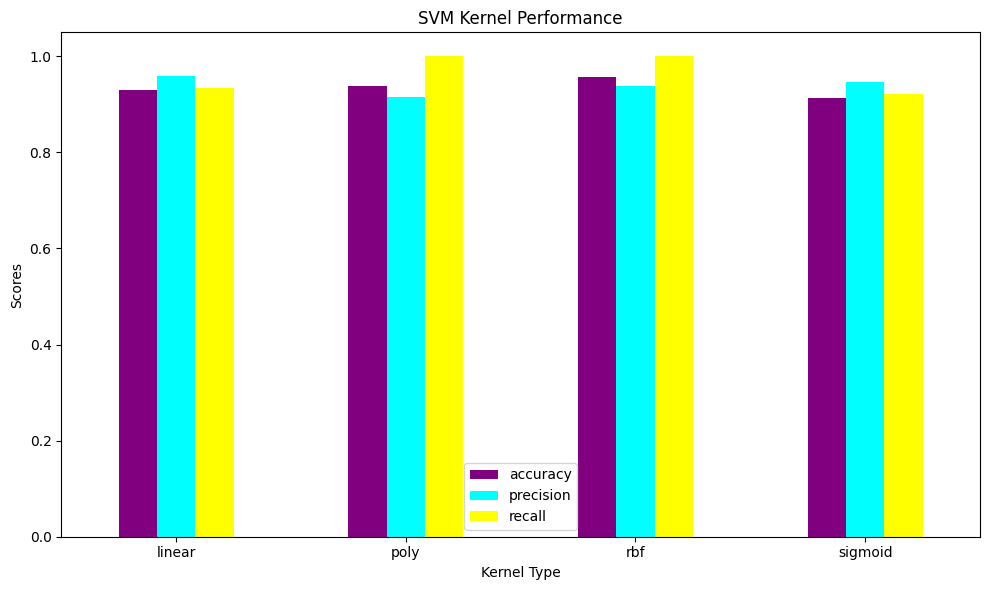

In [61]:
X = cancer.data
Y = cancer.target
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=67)

#Standardization
scaler_std = StandardScaler()
Xtrain = scaler_std.fit_transform(Xtrain)
Xtest = scaler_std.transform(Xtest)

#Classifying and training
LinKern = SVC(kernel='linear', C=1e4)
LinKern.fit(Xtrain, Ytrain)

PreKern = SVC(kernel='poly', C=1e4)
PreKern.fit(Xtrain, Ytrain)

RBFKern = SVC(kernel='rbf', C=1e4)
RBFKern.fit(Xtrain, Ytrain)

SigKern = SVC(kernel='sigmoid', C=1e4)
SigKern.fit(Xtrain, Ytrain)

#Predicting
L_pred = LinKern.predict(Xtest)
P_pred = PreKern.predict(Xtest)
R_pred = RBFKern.predict(Xtest)
S_pred = SigKern.predict(Xtest)
predictions = [L_pred, P_pred, R_pred, S_pred]

#Take the test outputspi
results = {}
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i, kernel in enumerate(predictions):
  accuracy = accuracy_score(Ytest, kernel)
  precision = precision_score(Ytest, kernel)
  recall = recall_score(Ytest, kernel)
  results[kernels[i]] = {'accuracy': accuracy, 'precision': precision, 'recall': recall}

  print(f"Class: {kernels[i]}")
  print(f"Accuracy: {accuracy}")
  print(f"Precision: {precision}")
  print(f"Recall: {recall}")

#Plotting Results
results_df = pd.DataFrame(results).T
results_df.plot(kind='bar', figsize=(10, 6), color =['purple', 'cyan', 'yellow'])
plt.title('SVM Kernel Performance')
plt.ylabel('Scores')
plt.xlabel('Kernel Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [62]:
#Problem 2
url= 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'
housing = pd.read_csv(url)

inputs = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
vlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in vlist:
    housing[col] = housing[col].map({'yes': 1, 'no': 0})

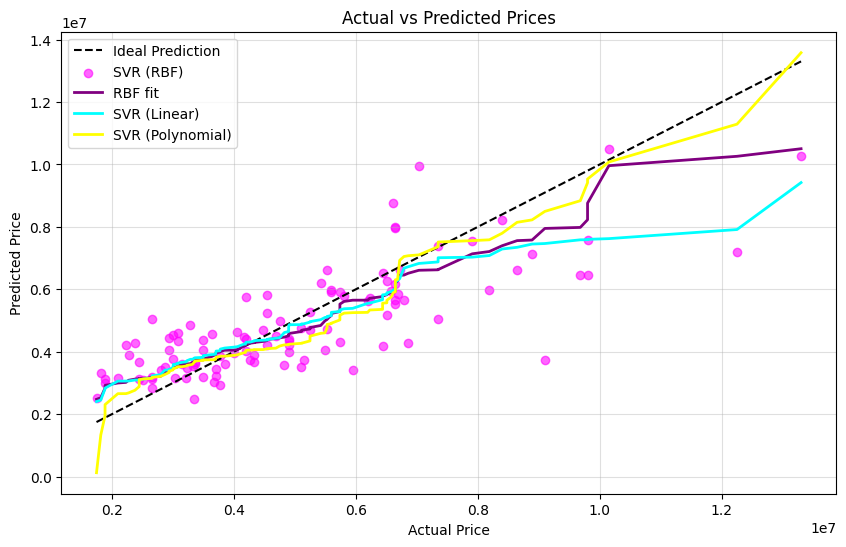

In [63]:
X2 = housing[inputs].values
Y2 = housing.values[:, 0];
X2train, X2test, Y2train, Y2test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

#Standardization
scalar = StandardScaler()
X2train = scalar.fit_transform(X2train)
X2test = scalar.transform(X2test)

#Classifying and Training
LinKern = SVR(kernel='linear', C=1e7)
LinKern.fit(X2train, Y2train)

PreKern = SVR(kernel='poly', C=1e7)
PreKern.fit(X2train, Y2train)

RBFKern = SVR(kernel='rbf', C=1e7)
RBFKern.fit(X2train, Y2train)

#Predicting
L_pred_svr = LinKern.predict(X2test)
P_pred_svr = PreKern.predict(X2test)
R_pred_svr = RBFKern.predict(X2test)
svr_predications = [L_pred_svr, P_pred_svr, R_pred_svr]

results_svr = {}
kernels = ['linear', 'poly', 'rbf']
for i, kernel in enumerate(svr_predications):
  rmse = np.sqrt(mean_squared_error(Y2test, kernel))
  r2 = r2_score(Y2test, kernel)

lw = 2
plt.figure(figsize=(10, 6))

#Sorting
sorted_idx = np.argsort(Y2test)
Y2test_sorted = Y2test[sorted_idx]

plt.plot([min(Y2test), max(Y2test)], [min(Y2test), max(Y2test)], color='black', linestyle='--', label='Ideal Prediction')
plt.scatter(Y2test, R_pred_svr, color='magenta', label='SVR (RBF)', alpha=0.6)
plt.plot(Y2test_sorted, np.sort(R_pred_svr), color='purple', lw=lw, label='RBF fit')
plt.plot(Y2test_sorted, np.sort(L_pred_svr), color='cyan', lw=lw, label='SVR (Linear)')
plt.plot(Y2test_sorted, np.sort(P_pred_svr), color='yellow', lw=lw, label='SVR (Polynomial)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.grid(True, alpha=0.4)
plt.show()